In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
manager_data = pd.read_csv('https://raw.githubusercontent.com/keithmcnulty/ebp_exercise/master/data.csv', index_col = 'employee_id')

In [6]:
manager_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, c4578853 to e81f635b
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   performance_group  571 non-null    object 
 1   yrs_employed       571 non-null    float64
 2   manager_hire       571 non-null    object 
 3   test_score         571 non-null    int64  
 4   group_size         571 non-null    int64  
 5   concern_flag       571 non-null    object 
 6   mobile_flag        571 non-null    object 
 7   customers          571 non-null    int64  
 8   high_hours_flag    571 non-null    object 
 9   transfers          571 non-null    int64  
 10  reduced_schedule   571 non-null    object 
 11  city               571 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 58.0+ KB


In [7]:
manager_data.head()

,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
employee_id,,,,,,,,,,,,
c4578853,Bottom,4.6,N,205,10,N,N,12,N,0,Y,San Francisco
a7d7afd6,Middle,5.3,N,227,14,N,Y,18,N,0,N,New York
272b93f1,Bottom,5.2,N,227,10,N,N,12,N,0,Y,Chicago
be8b6baa,Middle,4.9,N,273,19,N,N,26,Y,0,N,New York
a18ecc4e,Bottom,4.9,N,227,17,Y,N,26,Y,5,Y,Orlando


<AxesSubplot:xlabel='performance_group', ylabel='count'>

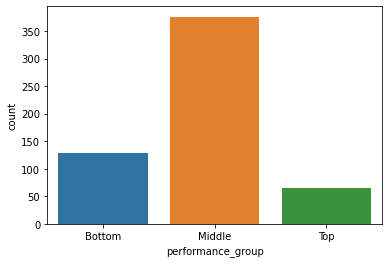

In [8]:
sns.countplot(data = manager_data, x = "performance_group")

In [9]:
## convert to binary bottom
binary_top = pd.get_dummies(manager_data['performance_group'])['Top']
binary_top.columnsumns = 'Top'

In [10]:
manager_data_top = pd.concat([manager_data.drop('performance_group', axis = 1), binary_top], axis = 1)

In [11]:
## get dummies
dummy_vars = ['manager_hire', 'concern_flag', 
             'mobile_flag', 'high_hours_flag', 
             'reduced_schedule', 'city']

dummies = pd.get_dummies(manager_data_top[dummy_vars], 
                         drop_first=True)


In [12]:
data = pd.concat([manager_data_top.drop(dummy_vars, axis = 1), dummies], axis = 1)

In [13]:
X = data.drop('Top', axis = 1)
y = data['Top']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
X_train

,yrs_employed,test_score,group_size,customers,transfers,manager_hire_Y,concern_flag_Y,mobile_flag_Y,high_hours_flag_Y,reduced_schedule_Y,city_Houston,city_New York,city_Orlando,city_San Francisco,city_Toronto
employee_id,,,,,,,,,,,,,,,
07eb21de,5.3,205,11,28,3,0,1,1,1,0,0,0,1,0,0
01462797,4.6,167,17,26,3,0,0,0,1,0,0,1,0,0,0
15995879,4.6,273,13,22,0,0,0,0,0,0,0,1,0,0,0
c848bdb0,4.8,227,13,22,5,0,0,0,0,0,0,0,0,0,1
4d593345,4.5,136,6,22,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474567e,5.0,280,15,24,0,0,0,0,1,0,0,1,0,0,0
72a59199,5.0,379,10,30,0,0,0,1,1,0,0,1,0,0,0
bd135c46,4.4,303,11,20,2,0,0,1,0,1,0,1,0,0,0


In [18]:
y_train

employee_id
07eb21de    0
01462797    0
15995879    0
c848bdb0    0
4d593345    0
           ..
3474567e    0
72a59199    0
bd135c46    0
6fe8b754    1
0b5637d7    0
Name: Top, Length: 399, dtype: uint8

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
model.coef_

array([[-0.97032143,  0.00445689,  0.11842462,  0.02184203, -0.25699179,
        -0.72127776,  0.1083604 ,  0.12694938,  0.79745237,  0.12447703,
        -0.81985398,  0.21762434,  0.040361  ,  0.41045521, -0.07866001]])

In [21]:
predicts = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test, predicts))

[[153   2]
 [ 17   0]]


In [24]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       155
           1       0.00      0.00      0.00        17

    accuracy                           0.89       172
   macro avg       0.45      0.49      0.47       172
weighted avg       0.81      0.89      0.85       172



In [25]:
## scale for subsequent models

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
    modeli = KNeighborsClassifier(n_neighbors=i)
    modeli.fit(X_train, y_train)
    predicti = modeli.predict(X_test)
    error_rate.append(np.mean(predicti != y_test))

In [29]:
error_rate = pd.DataFrame(dict(k=range(1,40), err=error_rate))

<AxesSubplot:xlabel='k', ylabel='err'>

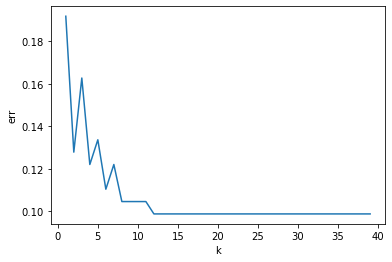

In [30]:
sns.lineplot(data = error_rate, x = 'k', y = 'err')

In [31]:
## k = 2 looks best

knnmodel = KNeighborsClassifier(n_neighbors=2)

In [32]:
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
knnpredicts = knnmodel.predict(X_test)

In [34]:
print(confusion_matrix(y_test, knnpredicts))

[[149   6]
 [ 16   1]]


In [35]:
print(classification_report(y_test, knnpredicts))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       155
           1       0.14      0.06      0.08        17

    accuracy                           0.87       172
   macro avg       0.52      0.51      0.51       172
weighted avg       0.83      0.87      0.85       172



In [36]:
## Basic decision Tree

from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

In [37]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
treepredicts = treemodel.predict(X_test)

In [39]:
print(confusion_matrix(y_test, treepredicts))

[[130  25]
 [ 16   1]]


In [40]:
print(classification_report(y_test, treepredicts))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       155
           1       0.04      0.06      0.05        17

    accuracy                           0.76       172
   macro avg       0.46      0.45      0.46       172
weighted avg       0.81      0.76      0.78       172



In [41]:
## random forest

from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier(n_estimators=50)

In [42]:
forestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [43]:
forestpredicts = forestmodel.predict(X_test)

In [44]:
print((confusion_matrix(y_test, forestpredicts)))

[[153   2]
 [ 17   0]]


In [45]:
print((classification_report(y_test, forestpredicts)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       155
           1       0.00      0.00      0.00        17

    accuracy                           0.89       172
   macro avg       0.45      0.49      0.47       172
weighted avg       0.81      0.89      0.85       172



In [46]:
from sklearn.svm import SVC

In [47]:
svmmodel = SVC()

In [48]:
svmmodel.fit(X_train, y_train)

SVC()

In [49]:
svmpredicts = svmmodel.predict(X_test)

In [50]:
print(confusion_matrix(y_test, svmpredicts))

[[155   0]
 [ 17   0]]


In [51]:
print((classification_report(y_test, svmpredicts)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       155
           1       0.00      0.00      0.00        17

    accuracy                           0.90       172
   macro avg       0.45      0.50      0.47       172
weighted avg       0.81      0.90      0.85       172



/home/ubuntu/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
X_train

array([[ 1.31562546, -0.40857399, -0.27930425, ...,  4.89259645,
        -0.3002731 , -0.78030184],
       [ 0.03351035, -0.88066657,  1.75927614, ..., -0.20439045,
        -0.3002731 , -0.78030184],
       [ 0.03351035,  0.43622326,  0.40022255, ..., -0.20439045,
        -0.3002731 , -0.78030184],
       ...,
       [-0.33280825,  0.80892793, -0.27930425, ..., -0.20439045,
        -0.3002731 , -0.78030184],
       [ 0.58298825, -0.5079619 ,  1.07974934, ..., -0.20439045,
        -0.3002731 ,  1.28155535],
       [-0.88228616, -0.32160957,  2.43880293, ..., -0.20439045,
        -0.3002731 , -0.78030184]])

In [53]:
annmodel = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
annmodel.add(Dense(15,  activation='relu'))


# hidden layer
annmodel.add(Dense(5, activation='relu'))


# output layer
annmodel.add(Dense(units=1,activation='sigmoid'))

# Compile model
annmodel.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
annmodel.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          validation_data=(X_test, y_test) 
          )

Epoch 1/25
13/13 [==============================] - 0s 21ms/step - loss: 0.6918 - val_loss: 0.6253
Epoch 2/25
13/13 [==============================] - 0s 4ms/step - loss: 0.6199 - val_loss: 0.5619
Epoch 3/25
13/13 [==============================] - 0s 4ms/step - loss: 0.5633 - val_loss: 0.5111
Epoch 4/25
13/13 [==============================] - 0s 4ms/step - loss: 0.5178 - val_loss: 0.4711
Epoch 5/25
13/13 [==============================] - 0s 4ms/step - loss: 0.4825 - val_loss: 0.4382
Epoch 6/25
13/13 [==============================] - 0s 4ms/step - loss: 0.4541 - val_loss: 0.4102
Epoch 7/25
13/13 [==============================] - 0s 4ms/step - loss: 0.4303 - val_loss: 0.3886
Epoch 8/25
13/13 [==============================] - 0s 6ms/step - loss: 0.4106 - val_loss: 0.3709
Epoch 9/25
13/13 [==============================] - 0s 8ms/step - loss: 0.3951 - val_loss: 0.3577
Epoch 10/25
13/13 [==============================] - 0s 8ms/step - loss: 0.3833 - val_loss: 0.3454
Epoch 11/25
13/13 

In [55]:
annpredicts = annmodel.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [56]:
print(confusion_matrix(y_test, annpredicts))

[[155   0]
 [ 17   0]]


In [57]:
print(classification_report(y_test, annpredicts ))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       155
           1       0.00      0.00      0.00        17

    accuracy                           0.90       172
   macro avg       0.45      0.50      0.47       172
weighted avg       0.81      0.90      0.85       172



/home/ubuntu/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from xgboost import XGBClassifier

In [79]:
xgbmodel = XGBClassifier(base_score = 0.8)

In [80]:
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xgbpredicts = xgbmodel.predict(X_test)

In [82]:
print(confusion_matrix(y_test, xgbpredicts))

[[147   8]
 [ 15   2]]


In [83]:
print(classification_report(y_test, xgbpredicts))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       155
           1       0.20      0.12      0.15        17

    accuracy                           0.87       172
   macro avg       0.55      0.53      0.54       172
weighted avg       0.84      0.87      0.85       172

